In [9]:
from pdfminer.pdfinterp import PDFResourceManager, process_pdf
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from io import StringIO
from io import open
from urllib.request import urlopen
import re
import os
import warnings
warnings.filterwarnings('ignore')

In [10]:
def read_pdf_file(pdfFile):
    pdfrm = PDFResourceManager()
    strio = StringIO()
    lapa = LAParams()
    device = TextConverter(pdfrm, strio, laparams = lapa)
    
    process_pdf(pdfrm, device, pdfFile)
    device.close()
    
    content = strio.getvalue()
    strio.close()
    return content

In [11]:
pdf_samsung = open("environment/LG생활건강.pdf", "rb")
a = read_pdf_file(pdf_samsung)
pdf_samsung.close() 

pdf_skens = open("environment/LG전자.pdf", "rb")
b = read_pdf_file(pdf_skens)
pdf_skens.close()

pdf_skens = open("environment/SK하이닉스.pdf", "rb")
c = read_pdf_file(pdf_skens)
pdf_skens.close()

pdf_skens = open("environment/삼성SDI.pdf", "rb")
d = read_pdf_file(pdf_skens)
pdf_skens.close()

pdf_skens = open("environment/삼성물산.pdf", "rb")
e = read_pdf_file(pdf_skens)
pdf_skens.close()

In [8]:
from konlpy.tag import Mecab
mecab = Mecab()

tokens = []
def word_token (x) :
    for token in mecab.pos(x):
        tokens.append(token)
    return tokens

word_token(a)
word_token(b)
word_token(c)
word_token(d)
word_token(e)

[('2020', 'SN'),
 ('LG', 'SL'),
 ('생활', 'NNG'),
 ('건강', 'NNG'),
 ('ESG', 'SL'),
 ('보고서', 'NNG'),
 ('F', 'SL'),
 ('O', 'SL'),
 ('R', 'SL'),
 ('P', 'SL'),
 ('E', 'SL'),
 ('O', 'SL'),
 ('P', 'SL'),
 ('L', 'SL'),
 ('E', 'SL'),
 ('A', 'SL'),
 ('N', 'SL'),
 ('D', 'SL'),
 ('T', 'SL'),
 ('H', 'SL'),
 ('E', 'SL'),
 ('P', 'SL'),
 ('L', 'SL'),
 ('A', 'SL'),
 ('N', 'SL'),
 ('E', 'SL'),
 ('T', 'SL'),
 ('', 'SY'),
 ('', 'SY'),
 ('About', 'SL'),
 ('This', 'SL'),
 ('Report', 'SL'),
 ('보고서', 'NNG'),
 ('개요', 'NNG'),
 ('LG', 'SL'),
 ('생활', 'NNG'),
 ('건강', 'NNG'),
 ('은', 'JX'),
 ('2009', 'SN'),
 ('년', 'NNBC'),
 ('부터', 'JX'),
 ('매년', 'MAG'),
 ('ESG', 'SL'),
 ('보고서', 'NNG'),
 ('를', 'JKO'),
 ('발간', 'NNG'),
 ('하', 'XSV'),
 ('여', 'EC'),
 ('당사', 'NNG'),
 ('의', 'JKG'),
 ('지속', 'NNG'),
 ('가능', 'NNG'),
 ('경영', 'NNG'),
 ('을', 'JKO'),
 ('외', 'NNG'),
 ('부', 'NNG'),
 ('에', 'JKB'),
 ('공유', 'NNG'),
 ('하', 'XSV'),
 ('고', 'EC'),
 ('있', 'VX'),
 ('습니다', 'EF'),
 ('.', 'SF'),
 ('‘', 'SY'),
 ('2020', 'SN'),
 ('LG', 'SL'),
 ('생

In [12]:
from konlpy.tag import Mecab
mecab = Mecab()
stop = ["삼성", "디스플레이", "관리"]
tokens = [token for token in mecab.pos(samsung_display)]

nodes = [t[0] for t in tokens]
vocab = [t[0] for t in tokens if t[0] not in stop if t[1] in ['NNG', 'NNP'] and len(t[0]) > 1]

print(nodes[:10])
print(vocab[:10])


['2020', 'LG', '생활', '건강', 'ESG', '보고서', 'F', 'O', 'R', 'P']
['생활', '건강', '보고서', '보고서', '개요', '생활', '건강', '보고서', '발간', '당사']


In [13]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

count = Counter(vocab)
words = dict(count.most_common())

In [14]:
%matplotlib inline 
import matplotlib 
from IPython.display import set_matplotlib_formats 
matplotlib.rc('font',family = 'Malgun Gothic') 
set_matplotlib_formats('retina') 
matplotlib.rc('axes',unicode_minus = False)


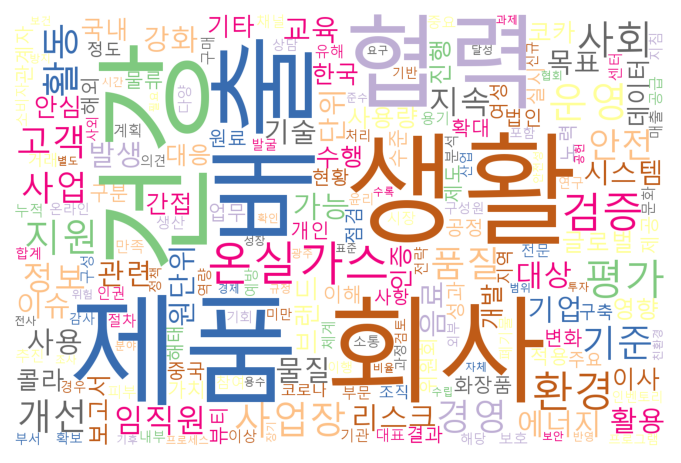

In [15]:
wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf', background_color='white',colormap = "Accent_r", 
                      width=1500, height=1000).generate_from_frequencies(words) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()